<a href="https://colab.research.google.com/github/kakureru/ISIT/blob/main/ISiT_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import networkx as nx
import sys
import requests

api_v = '5.81'
token = '' 

group = ['183090306', '198245847', '209580238', '58499883', '248925812',
         '203309613', '225067605', '87846703', '386101283', '275831361',
         '222110446', '98789579', '172039039', '466026608', '51345081',
         '159891320', '470872693', '176839273', '193172908', '152920018',
         '100429433', '96272105', '117653847', '73182682', '752353774',
         '93047688', '166062413']
graph = set()

In [77]:
class VkException(Exception):
	def __init__(self, message):
		self.message = message

	def __str__(self):
		return self.message

In [78]:
class VkFriends():

	def __init__(self, token, my_id, api_v):
		try:
			self.token = token
			self.my_id = my_id
			self.api_v = api_v
			my_inf = self.base_info([self.my_id])[0]
			self.my_name = my_inf['first_name']
			self.my_last_name = my_inf['last_name']
			self.all_friends = self.friends(self.my_id)
		except VkException as error:
			sys.exit(error)

	def request_url(self, method_name, parameters):
		return 'https://api.vk.com/method/{method_name}?{parameters}&v={api_v}&access_token={token}'.format(
			method_name=method_name, api_v=self.api_v, parameters=parameters, token=self.token)
	
	def base_info(self, ids):
		r = requests.get(self.request_url('users.get', 'user_ids=%s' % (','.join(map(str, ids))))).json()
		if 'error' in r.keys():
			raise VkException('Error message: %s. Error code: %s' % (r['error']['error_msg'], r['error']['error_code']))
		r = r['response']
		if 'deactivated' in r[0].keys():
			raise VkException("User deactivated")
		return r

	def friends(self, id):
		r = requests.get(self.request_url('friends.get', 'user_id=%s&fields=uid,first_name,last_name' % id)).json()['response']
		return [item for item in r['items']]

In [79]:
if __name__ == '__main__':
  for id in group:
     a = VkFriends(token, id, api_v)
     print( a.my_id, a.my_name, a.my_last_name)
     for friend in a.all_friends:
       if (str(friend.get('id')) in group):
         graph.add(tuple(sorted([int(a.my_id), int(friend.get('id'))])))

183090306 Святослав Редченко
198245847 Егор Попов
209580238 Костя Факалы
58499883 Данила Савельев
248925812 Влад Шевцов
203309613 Игорь Исаев
225067605 Илья Демин
87846703 Никита Караваев
386101283 Ярослав Родин
275831361 Антон Прощенко
222110446 Герман Озеров
98789579 Anush Nabiev
172039039 Фёдор Качанов
466026608 Ярослав Иноземцев
51345081 Иван Гаврилюк
159891320 Александр Фридовский
470872693 Дмитрий Ефремов
176839273 Алексей Петров
193172908 Ярослав Глазков
152920018 Владислав Иньков
100429433 Роман Соколов
96272105 Анатолий Борзилов
117653847 Михаил Ледяйкин
73182682 Вадим Никитаев
752353774 Кен Куворон
93047688 Кирилл Троян
166062413 Дмитрий Левченко


Максимальная центральность по степени
Александр Фридовский 159891320
Егор Попов 198245847

Максимальная центральность по собственному вектору
Егор Попов 198245847

Максимальная центральность по близости
Егор Попов 198245847
Костя Факалы 209580238

Максимальная центральность по посредничеству
Егор Попов 198245847

Максимальная центральность по нагрузке
Егор Попов 198245847

Максимальная центральность по гамонической центральности
Егор Попов 198245847


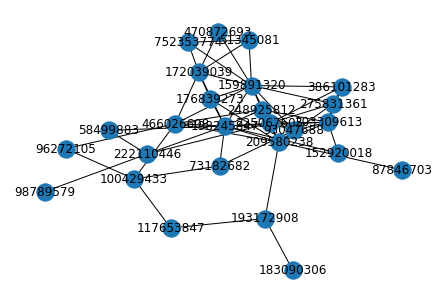

In [86]:
G = nx.Graph()
G.add_edges_from(graph)

def max_centrality(centrality):
  maxx = max(centrality[i] for i in G.nodes)
  for id in G.nodes:
    if centrality[id]==maxx:
      a = VkFriends(token, id, api_v)
      print(a.my_name, a.my_last_name, a.my_id)

print("Максимальная центральность по степени")
max_centrality(nx.degree_centrality(G))

print("\nМаксимальная центральность по собственному вектору")
max_centrality(nx.eigenvector_centrality(G))

print("\nМаксимальная центральность по близости")
max_centrality(nx.closeness_centrality(G))

print("\nМаксимальная центральность по посредничеству")
max_centrality(nx.betweenness_centrality(G))

print("\nМаксимальная центральность по нагрузке")
max_centrality(nx.load_centrality(G))

print("\nМаксимальная центральность по гамонической центральности")
max_centrality(nx.harmonic_centrality(G))

nx.draw(G, with_labels = True)